In [17]:
import numpy as np
#from numpy.random import seed
#from numpy.random import randn

from matplotlib import pyplot as plt

In [18]:
class TextFormatting:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [19]:
def getProbabilityMatrix(m, sum_m):
    p = np.zeros((3, 3))
    for i in range(len(p)):
        for j in range(len(p[i])):
            p[i][j] += m[i][j]
            p[i][j] /= sum_m[i]
    
    return p

In [20]:
def showGameStats():
    print('Stats...')
    print('p_trans:')
    print(p_trans)
    print('p_trans_sums:')
    print(p_trans_sums)
    print('n: {}, payoff: {}\n'.format(len(payoff), payoff[len(payoff) - 1]))
    
    plt.plot(payoff)
    plt.ylabel('Payoff')
    plt.xlabel('Round')
    plt.show()

In [21]:
print(TextFormatting.BOLD + '"Rock - Paper - Scissors"' + TextFormatting.END + '.')
print('A game based on a machine learning algorithm')
print('that implements a statistical model called')
print(TextFormatting.UNDERLINE + 'Hidden Markov Model' + TextFormatting.END + ' (HMM).')
print('To draw ' + TextFormatting.UNDERLINE + 'rock' + TextFormatting.END + ', press \'r\'.')
print('To draw ' + TextFormatting.UNDERLINE + 'paper' + TextFormatting.END + ', press \'p\'.')
print('To draw ' + TextFormatting.UNDERLINE + 'scissors' + TextFormatting.END + ', press \'s\'.')
print('To ' + TextFormatting.UNDERLINE + 'end the game' + TextFormatting.END + ', press \'q\'.')
print('To show ' + TextFormatting.UNDERLINE + 'current game status' + TextFormatting.END + ', press any other key.\n')

"Rock - Paper - Scissors".
A game based on a machine learning algorithm
that implements a statistical model called
Hidden Markov Model (HMM).
To draw rock, press 'r'.
To draw paper, press 'p'.
To draw scissors, press 's'.
To end the game, press 'q'.
To show current game status, press any other key.



In [57]:
# setup
states = ['Rock', 'Paper', 'Scissors']
p_start = np.array(
    [np.random.randn(),
     np.random.randn(),
     np.random.randn()])

while p_start[0] <= 0 or p_start[1] <= 0 or p_start[2] <= 0:
    p_start = np.array([np.random.randn(), np.random.randn(), np.random.randn()])

sum_start = np.sum(p_start)
p_start[0] /= sum_start
p_start[1] /= sum_start
p_start[2] /= sum_start

p_trans = np.ones((3, 3))
p_trans_sums = np.array([3., 3., 3.])

In [58]:
payoff = [0]
state = np.random.choice(states, replace = True, p = p_start)
previousInput = 'q';

Press a key to play: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Scissors!
User won!
Your turn: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Scissors!
User won!
Your turn: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Scissors!
User won!
Your turn: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Rock!
It's a tie!
Your turn: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Rock!
It's a tie!
Your turn: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Paper!
Opponent won!
Your turn: r
User played Rock!
Opponent played Rock!
It's a tie!
Your turn: 0
Stats...
p_trans:
[[14.  1.  1.]
 [ 1

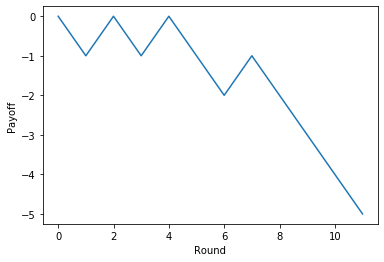

KeyboardInterrupt: 

In [59]:
userInput = input('Press a key to play: ')
while userInput != 'q':
    
    if userInput == 'r':
        print('User played ' + TextFormatting.BOLD + 'Rock!' + TextFormatting.END)
    
    elif userInput == 'p':
        print('User played ' + TextFormatting.BOLD + 'Paper!' + TextFormatting.END)
    
    elif userInput == 's':
        print('User played ' + TextFormatting.BOLD + 'Scissors!' + TextFormatting.END)
    
    else:
        showGameStats()
        userInput = input('Your turn: ')
        continue
        
    if state == 'Rock':
        state = 'Paper'
    elif state == 'Paper':
        state = 'Scissors'
    else:
        state = 'Rock'
    
    print('Opponent played ' + TextFormatting.BOLD + state + '!' + TextFormatting.END)
    
    
    if ((userInput == 'p' and state == 'Rock')
        or (userInput == 's' and state == 'Paper')
        or (userInput == 'r' and state == 'Scissors')):
        print('User won!')
        payoff.append(payoff[len(payoff) - 1] + 1)
    
    elif ((userInput == 's' and state == 'Rock')
        or (userInput == 'r' and state == 'Paper')
        or (userInput == 'p' and state == 'Scissors')):
        print('Opponent won!')
        payoff.append(payoff[len(payoff) - 1] - 1)
    
    else:
        print('It\'s a tie!')
    
    
    if userInput == 'r' and previousInput == 'r':
        p_trans[0][0] += 1.
        p_trans_sums[0] += 1.
    elif userInput == 'r' and previousInput == 'p':
        p_trans[1][0] += 1.
        p_trans_sums[1] += 1.
    elif userInput == 'r' and previousInput == 's':
        p_trans[2][0] += 1.
        p_trans_sums[2] += 1.
    elif userInput == 'p' and previousInput == 'r':
        p_trans[0][1] += 1.
        p_trans_sums[0] += 1.
    elif userInput == 'p' and previousInput == 'p':
        p_trans[1][1] += 1.
        p_trans_sums[1] += 1.
    elif userInput == 'p' and previousInput == 's':
        p_trans[2][1] += 1.
        p_trans_sums[2] += 1.
    elif userInput == 's' and previousInput == 'r':
        p_trans[0][2] += 1.
        p_trans_sums[0] += 1.
    elif userInput == 's' and previousInput == 'p':
        p_trans[1][2] += 1.
        p_trans_sums[1] += 1.
    elif userInput == 's' and previousInput == 's':
        p_trans[2][2] += 1.
        p_trans_sums[2] += 1.
    
    
    if userInput == 'r':
        state = np.random.choice(states, replace = True, p = getProbabilityMatrix(p_trans, p_trans_sums)[0])
    elif userInput == 'p':
        state = np.random.choice(states, replace = True, p = getProbabilityMatrix(p_trans, p_trans_sums)[1])
    else:
        state = np.random.choice(states, replace = True, p = getProbabilityMatrix(p_trans, p_trans_sums)[2])
    
    
    previousInput = userInput
    userInput = input('Your turn: ')

In [71]:
print('Thank You for playing ' + TextFormatting.BOLD + '"Rock - Paper - Scissors"' + TextFormatting.END + '!')

Thank You for playing "Rock - Paper - Scissors"!
